# Prediction of an Internet advertisement to be clicked

This project is based on a classification problem on whether an internet advertise will be clicked or not based on deveral attributes.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd D:\New

D:\New


In [3]:
# read data using pandas
df = pd.read_csv('advertising.csv')
df.head()

,Time spent,age,area Income,Daily Internet Usage,ad Topic Line,City,Male,Country,Timestamp,Clicked on ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# drop 'Timestamp' column since we will not deal with time series in this section
df.drop(['Timestamp'],axis=1,inplace=True)

### Exploratory analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Time spent              1000 non-null float64
age                     1000 non-null int64
area Income             1000 non-null float64
Daily Internet Usage    1000 non-null float64
ad Topic Line           1000 non-null object
City                    1000 non-null object
Male                    1000 non-null int64
Country                 1000 non-null object
Clicked on ad           1000 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


There are no null/missing values in the data, so we can move ahead directly to visualization

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


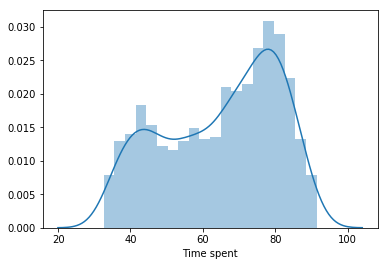

In [6]:
# Check distribution to see how much time people usually spend on internet
sns.distplot(df['Time spent'],bins=20)

Time spent on internet ranges from 35 mins to 90 mins, where more crowd is found at approx 80 mins

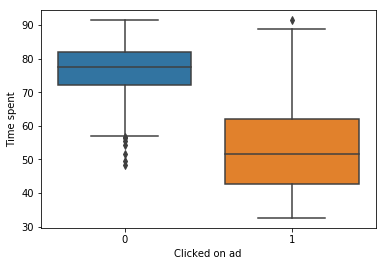

In [7]:
# study relation between time spent and clicking on the ad
sns.boxplot(x='Clicked on ad',y='Time spent',data=df)

Quite opposite of what we expected, The more people spend time on Internet, less likely for them to click on the ads.

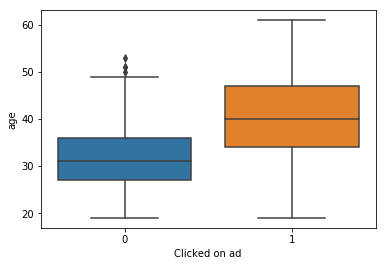

In [8]:
sns.boxplot(x='Clicked on ad',y='age',data=df)

Here, people who cicked on the ads have average age more than the ones who didn't click.

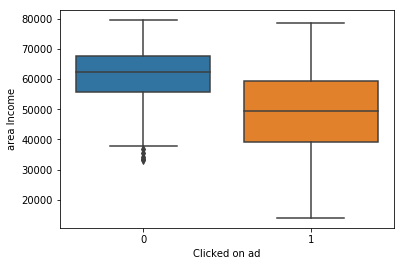

In [9]:
sns.boxplot(x='Clicked on ad',y='area Income',data=df)

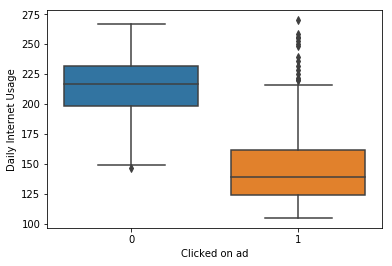

In [10]:
sns.boxplot(x='Clicked on ad',y='Daily Internet Usage',data=df)

This clearly shows that people with less usage of Internet tend to click more on the ads

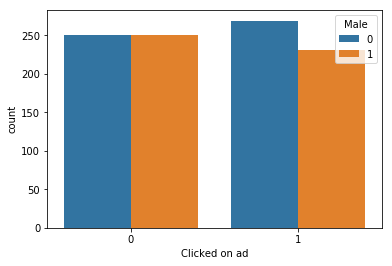

In [11]:
sns.countplot(x='Clicked on ad',data=df,hue='Male')

In [12]:
df['City'].nunique()

969

In [13]:
df['Country'].nunique()

237

here we see that there are 969 unique cities in the data column 'City'.
With this size of dataset, it is not sufficient information to predict target class based on citit or country, so in this case we have to drop these columns

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['Time spent','area Income','Daily Internet Usage', 'age','Male']]
y = df['Clicked on ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

Here we have only selected the attributes which tend to show some correlation with target class, although with more data based on cities and region, those attributes can be included.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LR=LogisticRegression()

In [18]:
LR.fit(X_train,y_train)
pred = LR.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[151  11]
 [ 17 121]]


             precision    recall  f1-score   support

          0       0.90      0.93      0.92       162
          1       0.92      0.88      0.90       138

avg / total       0.91      0.91      0.91       300



We can already acheive 91% accuracy based on the features we selected.

Though with a bigger dataset with more information on cities, country, we can involve clicking of ads based on regions and with time stamp included, we can study more about likelyness of ad getting clicked on some specific duration.